In [1]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

## Seg check

In [2]:
#See shape for each seg, to check if they are correct

images = {}

segmentations_name = os.listdir(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr')

for i in range(len(segmentations_name)):
    seg_load  = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\{}'.format(segmentations_name[i]))
    
    images[segmentations_name[i]] = sitk.GetArrayFromImage(seg_load).shape

In [3]:
images.values()

dict_values([(269, 704, 704), (270, 704, 704), (539, 704, 704), (539, 704, 704), (269, 704, 704), (374, 704, 704)])

In [5]:
nifti_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\ESTNEMC0027RCA_001.nii.gz')
seg_pixel_data = sitk.GetArrayFromImage(nifti_seg)

In [8]:
unique, counts = np.unique(seg_pixel_data[27,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 418296]
 [     1  22121]
 [     2  32855]
 [     3    507]
 [     4    497]
 [     5  14721]
 [     6   6619]]


In [10]:
frame_annots = []

for frame in range(len(seg_pixel_data)):

    if np.all((seg_pixel_data[frame,:,:] == 0)):
        continue

    else:
        frame_annots.append(frame)

frame_annots

[27, 40, 144, 146, 148, 151, 153, 160, 200, 205, 240, 255, 268]

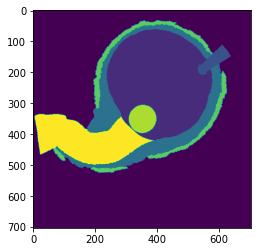

In [17]:
frame = 160

plt.imshow(seg_pixel_data[frame,:,:])

In [4]:
list_lens = []
segmentations_name = os.listdir(r'Z:\grodriguez\CardiacOCT\data\segs_rest')

for i in range(len(segmentations_name)):

    seg_load  = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\segs_rest\{}'.format(segmentations_name[i]))
    
    seg_pixel_data = sitk.GetArrayFromImage(seg_load)

    frame_annots = []

    for frame in range(seg_pixel_data.shape[0]):
        if np.all((seg_pixel_data[frame,:,:] == -1)):
            continue

        if np.all((seg_pixel_data[frame,:,:] == 0)):
            print('Lost labels in {}'.format(segmentations_name[i]))

        else:
            frame_annots.append(frame)

    list_lens.append(len(frame_annots))

In [4]:
for i in range(len(segmentations_name)):

    seg_load  = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\{}'.format(segmentations_name[i]))
    seg_pixel_data = sitk.GetArrayFromImage(seg_load)

    for frame in range(seg_pixel_data.shape[0]):
        if np.isnan(seg_pixel_data[frame,:,:]).any():
            print('nan detected')

        else:
            continue

In [18]:
print(nifti_seg.GetSpacing())
print(nifti_seg.GetDirection())

(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


## File check

In [3]:
nifti_1 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\imagesTr\ESTNEMC0027RCA_001_0000.nii.gz')
nifti_2 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\imagesTr\ESTNEMC0027RCA_001_0001.nii.gz')
nifti_3 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\imagesTr\ESTNEMC0027RCA_001_0002.nii.gz')
#nifti_4 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\imagesTr\NLDISALA0073_019_0000.nii.gz')


nifti_1_pixel_data = sitk.GetArrayFromImage(nifti_1)
nifti_2_pixel_data = sitk.GetArrayFromImage(nifti_2)
nifti_3_pixel_data = sitk.GetArrayFromImage(nifti_3)
#nifti_4_pixel_data = sitk.GetArrayFromImage(nifti_4)

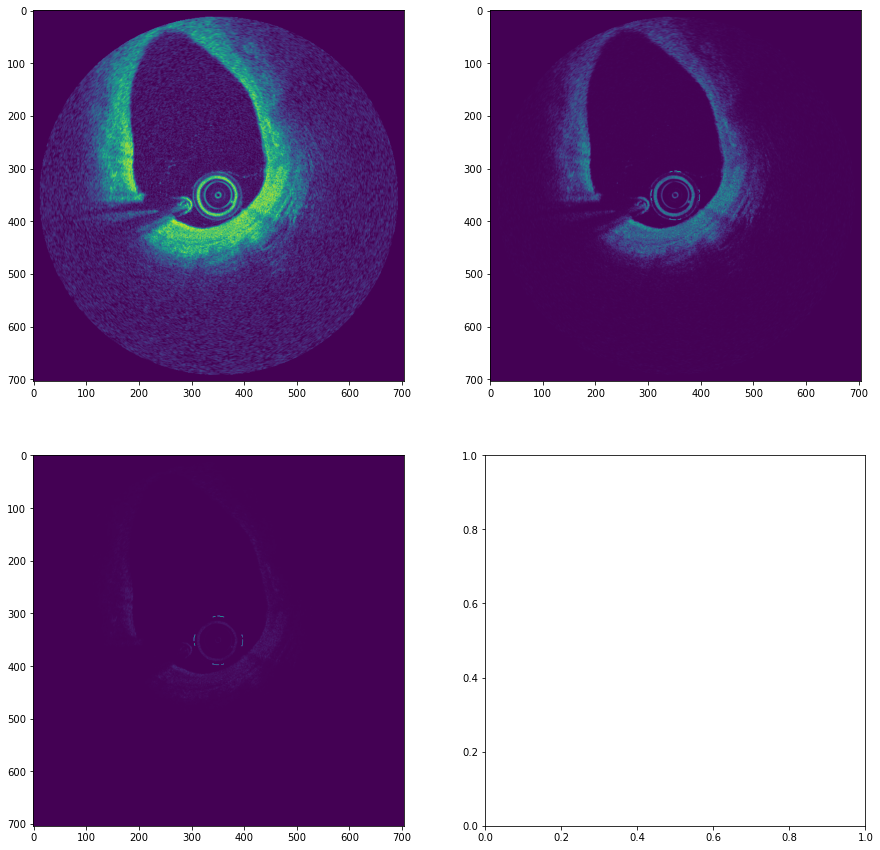

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax = ax.flatten()

frame = 0

ax[0].imshow(nifti_1_pixel_data[frame,:,:])
ax[1].imshow(nifti_2_pixel_data[frame,:,:])
ax[2].imshow(nifti_3_pixel_data[frame,:,:])

In [21]:
print(nifti_1.GetSpacing())
print(nifti_1.GetDirection())

(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [23]:
for frame in range(nifti_1_pixel_data.shape[0]):
    if np.isnan(nifti_1_pixel_data[frame,:,:]).any():
        print('nan detected')

    else:
        continue

In [25]:
seg2 = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\NLDRADB0086_018.nii.gz'))

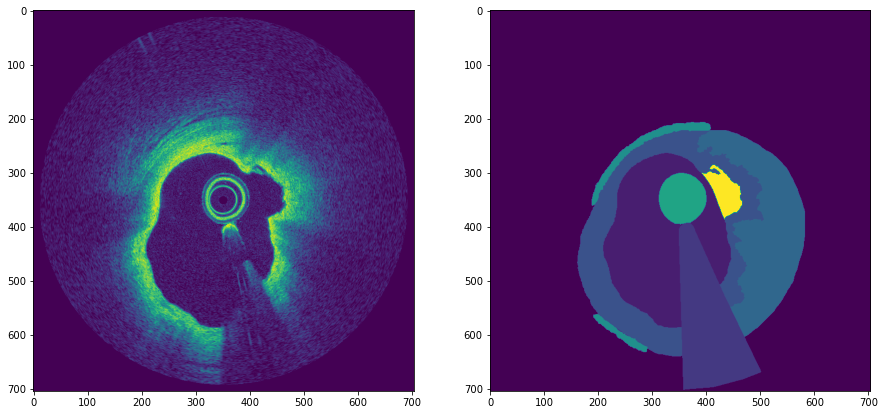

In [30]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

frame = 240

axes[0].imshow(nifti_1_pixel_data[frame,:,:])
axes[1].imshow(seg2[frame,:,:])